In [1]:
%store -r

In [2]:
%store

Stored variables and their in-db values:
qh                           -> array([[-0.19359317,  0.504065  ,  0.9988805 , ...
queries_selected             -> {4, 410, 597, 566, 279, 246, 602, 510}
raw_hashes                   -> array([[ 1.5774433e-01,  6.3503647e-01,  1.0929040
selected_data                -> [({131072, 425985, 983043, 524292, 131077, 655364,
selected_q2d                 -> [          data      distance
0            0  (1.3
selected_qh                  -> [array([ 0.32263142,  0.6306272 ,  0.48695165,  0.
selected_tables              -> [(0, 48, 26), (35, 0, 44), (31, 26, 47), (44, 6, 4


In [30]:
import json
with open("/media/mydrive/distribution/ann-codes/in-memory/EXPERIMENTS/random/ann_cd2.json") as fin:
    config = json.load(fin)
config

{'data filename': '/media/mydrive/distribution/ann-codes/in-memory/EXPERIMENTS/random/random-train.fvecs',
 'query filename': '/media/mydrive/distribution/ann-codes/in-memory/EXPERIMENTS/random/random-test.fvecs',
 'dimension': 128,
 'training size': 1000000,
 'testing size': 1000,
 'query mode': 'hashed queries',
 'hash table width': 24,
 'load index': False,
 'index path': '/dev/null',
 'number of partitions': 1,
 'allow overwrite': True,
 'compute ground truth': False,
 'number of neighbors': 100,
 'probes per table': 100,
 'printing mode': {'id': True,
  'table': True,
  'bucket': True,
  'distance': False},
 'hash table parameters': [{'k': 9, 'l': 50, 'bucket width': 1.75}],
 'query hash filename': '/media/mydrive/distribution/ann-codes/in-memory/EXPERIMENTS/random/query_hash.fvecs',
 'candidate filename': '/media/mydrive/distribution/ann-codes/in-memory/EXPERIMENTS/random/candidates/ex2',
 'kernel filename': '/media/mydrive/distribution/ann-codes/in-memory/EXPERIMENTS/random/weig

In [5]:
from fvecs import *
data = fvecs_read(config["data filename"])

In [6]:
import numpy as np
distance = fvecs_read(config["distance file"])
np.min(distance), np.max(distance)

(0.99456745, 1.7277273)

In [7]:
d3 = distance[3,:]
np.min(d3), np.max(d3)

(1.0785445, 1.6850685)

In [9]:
import pandas as pd
dist_f = pd.DataFrame({"id": list(range(1000000)), "dist": d3})

In [13]:
dist_count = dist_f.groupby("dist group").count()
dist_count

,id,dist
dist group,,
"(1.0, 1.01]",0,0
"(1.01, 1.02]",0,0
"(1.02, 1.03]",0,0
"(1.03, 1.04]",0,0
"(1.04, 1.05]",0,0
...,...,...
"(1.64, 1.65]",18,18
"(1.65, 1.66]",11,11
"(1.66, 1.67]",6,6


In [14]:
exp_path = "/media/mydrive/distribution/ann-codes/in-memory/EXPERIMENTS/random"
dist_count.to_csv(exp_path + "/dist_count.csv")

In [15]:
from math import sqrt
def trigonometric(dist):
    radius = 1
    q2c = 1
    costheta = (radius * radius + q2c * q2c - dist * dist) / (2 * radius * q2c)
    a = radius * costheta
    b = radius * sqrt(1 - costheta * costheta)
    return a, b

In [16]:
trigonometric(1), trigonometric(1.2), trigonometric(1.4), trigonometric(0.8), trigonometric(1.8)

((0.5, 0.8660254037844386),
 (0.28, 0.96),
 (0.02000000000000013, 0.999799979995999),
 (0.6799999999999999, 0.7332121111929345),
 (-0.6200000000000001, 0.7846018098373212))

In [20]:
qh = fvecs_read(config["query hash filename"])
qh.shape

(1000, 450)

In [21]:
qh = qh[3,:]
qh = qh.reshape((50, 9))
np.linalg.norm(qh, axis=1)

array([2.009734 , 2.0071027, 2.8102922, 2.5894718, 1.973212 , 3.2363935,
       2.4910886, 2.3918133, 3.2440848, 2.0695832, 2.3005588, 2.7523203,
       2.4254208, 2.1955483, 2.1933644, 2.5032716, 2.1011815, 2.4772303,
       2.1751862, 1.8850384, 2.620159 , 2.034828 , 2.1980448, 2.051328 ,
       2.1867251, 2.4039938, 2.780062 , 3.3954294, 2.4654107, 2.5716145,
       2.2741354, 3.3134823, 2.1837995, 2.2280314, 2.0111663, 2.1370742,
       2.621291 , 2.0439188, 2.5330725, 1.7382069, 2.6365056, 2.9977648,
       2.4758239, 1.6144464, 1.9621611, 2.1533263, 2.2394512, 2.809265 ,
       1.7466234, 2.3058476], dtype=float32)

In [26]:
x_bins = np.arange(1.005, 1.685, 0.01)
x_bins

array([1.005, 1.015, 1.025, 1.035, 1.045, 1.055, 1.065, 1.075, 1.085,
       1.095, 1.105, 1.115, 1.125, 1.135, 1.145, 1.155, 1.165, 1.175,
       1.185, 1.195, 1.205, 1.215, 1.225, 1.235, 1.245, 1.255, 1.265,
       1.275, 1.285, 1.295, 1.305, 1.315, 1.325, 1.335, 1.345, 1.355,
       1.365, 1.375, 1.385, 1.395, 1.405, 1.415, 1.425, 1.435, 1.445,
       1.455, 1.465, 1.475, 1.485, 1.495, 1.505, 1.515, 1.525, 1.535,
       1.545, 1.555, 1.565, 1.575, 1.585, 1.595, 1.605, 1.615, 1.625,
       1.635, 1.645, 1.655, 1.665, 1.675, 1.685])

In [27]:
gt_bins = list(dist_count["id"])
gt_bins

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 3,
 8,
 5,
 19,
 40,
 65,
 112,
 165,
 292,
 438,
 639,
 1007,
 1511,
 2117,
 3120,
 4524,
 6039,
 8345,
 11137,
 14339,
 18609,
 23466,
 28373,
 34146,
 39922,
 45655,
 51480,
 55674,
 59613,
 62319,
 63396,
 62849,
 60529,
 57308,
 52562,
 47313,
 41071,
 34332,
 28298,
 22440,
 17023,
 13011,
 9121,
 6495,
 4351,
 2648,
 1764,
 1036,
 599,
 334,
 183,
 72,
 42,
 18,
 11,
 6,
 3,
 1]

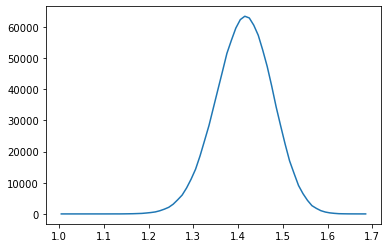

In [28]:
import matplotlib.pyplot as plt
plt.plot(x_bins, gt_bins)

In [94]:
def recall(table_probs):
    prod = 1.0
    for p in table_probs:
        prod *= 1 - p
    return 1 - prod

def predict_prob(dist):
    a, b = trigonometric(dist)
    rel_pos = a * qh_raw
    
    table_probs = []
    for tid in range(50):
        t_prob = 0
        for probe in range(100):
            probe_s = probing_seq[probe * 50 + tid]
            lb = probe_s * 1.75 - bias[tid]
            ub = lb + 1.75
            lb = (lb - rel_pos[tid]) / b
            ub = (ub - rel_pos[tid]) / b
            prod = 1
            for dim in range(9):
                prod *= norm.cdf(ub[dim]) - norm.cdf(lb[dim])
            t_prob += prod + 0.5 ** (20)
        table_probs.append(t_prob)
    return table_probs

In [96]:
ans = predict_prob(1.5)

In [97]:
recall(ans), recall(ans[:17])

(0.6628651472838397, 0.22864354439603873)

In [37]:
hfuncs = fvecs_read_non_uniform(config["result filename"])
bias = hfuncs[-1]
bias = bias.reshape((50, 9))
hfuncs = np.array(hfuncs[:-1])
hfuncs.shape, bias.shape

((450, 128), (50, 9))

In [35]:
query = fvecs_read(config["query filename"])[3]
qh_raw = hfuncs @ query.transpose()
qh_raw = qh_raw.reshape((50, 9))
np.linalg.norm(qh_raw, axis=1)

array([2.9925256, 3.4762182, 2.687157 , 2.7234828, 2.832537 , 3.929239 ,
       3.2654278, 3.3945978, 3.5660841, 3.7276568, 2.4524884, 3.3340154,
       2.2471194, 2.6787872, 3.6441512, 3.5093365, 1.7463028, 3.612031 ,
       2.626326 , 3.638707 , 2.9847493, 2.1354156, 3.025804 , 2.7158453,
       2.223009 , 2.3628879, 3.6770444, 3.6943655, 3.2699447, 3.1024241,
       3.0809813, 3.9628305, 2.6052418, 1.9730846, 1.827606 , 1.6904502,
       2.464863 , 2.4923   , 2.963651 , 1.9479736, 3.1506386, 2.7258244,
       2.1887405, 1.9457631, 2.5359344, 1.9626727, 2.4177253, 2.8360074,
       3.3819249, 2.8380384], dtype=float32)

In [39]:
np.max(qh - (qh_raw + bias) / 1.75)

2.9802322e-07

In [44]:
from scipy.stats import norm

In [46]:
norm.cdf(1)

0.8413447460685429

In [48]:
predict_prob(0.1)

[array([1.44827860e-03, 4.35388235e-34]), array([-8.63443668e-06,  3.19803567e-28]), array([-4.13622628e-16, -1.54708852e-43]), array([-2.35453459e-24,  6.14686080e-43]), array([3.16464985e-23, 1.15896436e-17]), array([9.56811195e-47, 1.31283682e-26]), array([-1.03274428e-59,  1.97004418e-45]), array([5.62534786e-84, 2.78777289e-45]), array([-5.43948327e-101,  1.07384410e-038]), array([-0.00000000e+00,  1.65634143e-25]), array([-0.00000000e+00, -6.52118843e-33]), array([0.00000000e+00, 7.29743536e-50]), array([-0.00000000e+00,  7.89475115e-43]), array([0.00000000e+00, 6.22300197e-40]), array([-0.00000000e+00,  1.86402196e-35]), array([0.00000000e+00, 5.29618738e-41]), array([-0.00000000e+00, -1.87377532e-46]), array([ 0.00000000e+00, -4.86466682e-25]), array([-0.00000000e+00, -6.25183097e-44]), array([ 0.00000000e+00, -5.62010628e-20]), array([-0.00000000e+00,  2.24243433e-47]), array([0.00000000e+00, 6.77430111e-48]), array([-0.00000000e+00,  2.78748822e-45]), array([-0.00000000e+00, 

array([1.43965667e-03, 3.33066907e-16])

In [84]:
probing_seq = ivecs_read_non_uniform(exp_path + "/probing_sequence_v.ivecs")
len(probing_seq)

5001000

In [86]:
probing_seq = np.array(probing_seq[5001*3+1:5001*4])[:, :-1]
probing_seq.shape

(5000, 9)

In [6]:
from read_candidate import load_candidate

def estimate(conf_path, query, bins, l):
    candiate_tables = load_candidate(query, conf_path)[:l]
    flat = []
    for ct in candiate_tables:
        flat.extend(ct)
    candidates = set(flat)

    dist_f = pd.DataFrame({"id": list(range(1000000)), "dist": distance[query, :]})
    distance_group = pd.cut(dist_f["dist"], bins=np.arange(*bins))
    dist_f["dist group"] = distance_group
    cand_f = dist_f.loc[candidates]
    gt_count = dist_f.groupby("dist group").count()
    gt_count = np.array(gt_count["id"])
    cand_count = cand_f.groupby("dist group").count()
    cand_count = np.array(cand_count["id"])
    
    return gt_count, cand_count / recall_qh[query, :]
    


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

array([0.05669975, 0.05886448, 0.05949961, 0.06014847, 0.06156327,
       0.06259213, 0.06378792, 0.06501943, 0.06603715, 0.06750948,
       0.06862843, 0.06814745, 0.06930986, 0.06985877, 0.07121929,
       0.07271317, 0.07318905, 0.07419169, 0.07483925, 0.07544036,
       0.07664407, 0.07717977, 0.07797264, 0.07845087, 0.07850353,
       0.07996397, 0.08081174, 0.08140484, 0.08294961, 0.08380137,
       0.08464911, 0.08596416, 0.08706232, 0.08873182, 0.09051859,
       0.0931539 , 0.09532023, 0.09796462, 0.10048093, 0.10239754,
       0.10457754, 0.10681067, 0.10852585, 0.11096872, 0.11362482,
       0.11657711, 0.11966548, 0.12317274, 0.12806221, 0.13280953,
       0.13875287, 0.14776988, 0.15166351, 0.16430714, 0.17477094,
       0.18646793, 0.21040682, 0.23955906, 0.28876075, 0.37124925])

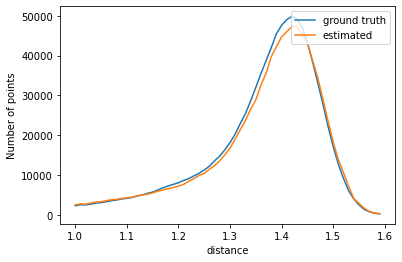

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fvecs import *
import json

dataset = "deep"
exp_path = "/media/mydrive/distribution/ann-codes/in-memory/EXPERIMENTS/" + dataset
conf_path = exp_path + "/ann_de.json"
l = 30

with open(conf_path) as fin:
    conf = json.load(fin)
x_bins = np.arange(*conf["histogram bins"])[:-1]
distance = fvecs_read(exp_path + "/distances.fvecs")
recall_qh = fvecs_read(conf["result filename"])
mre = np.zeros(len(x_bins))
np.seterr(all="ignore")
for qid in range(1000):
    print(qid)
    gt, esti = estimate(conf_path, qid, conf["histogram bins"], l)
    plt.clf()
    ax = plt.gca()
    ax.plot(x_bins, gt, label="ground truth")
    ax.plot(x_bins, esti, label="estimated")
    ax.set_xlabel("distance")
    ax.set_ylabel("Number of points")
    ax.legend(loc="upper right")
    plt.savefig("/media/mydrive/distribution/ann-codes/in-memory/EXPERIMENTS/plots/{}_triang_{}.pdf".format(
            dataset, qid))
    mre_na = np.abs(gt - esti) / gt
    mre_na[np.isnan(mre_na)] = 0
    mre += mre_na
mre /= 1000
mre

In [ ]:
x_bins, x_bins.shape


(array([1.005, 1.015, 1.025, 1.035, 1.045, 1.055, 1.065, 1.075, 1.085,
        1.095, 1.105, 1.115, 1.125, 1.135, 1.145, 1.155, 1.165, 1.175,
        1.185, 1.195, 1.205, 1.215, 1.225, 1.235, 1.245, 1.255, 1.265,
        1.275, 1.285, 1.295, 1.305, 1.315, 1.325, 1.335, 1.345, 1.355,
        1.365, 1.375, 1.385, 1.395, 1.405, 1.415, 1.425, 1.435, 1.445,
        1.455, 1.465, 1.475, 1.485, 1.495, 1.505, 1.515, 1.525, 1.535,
        1.545, 1.555, 1.565, 1.575, 1.585, 1.595, 1.605, 1.615, 1.625,
        1.635, 1.645, 1.655, 1.665, 1.675, 1.685]),
 (69,))

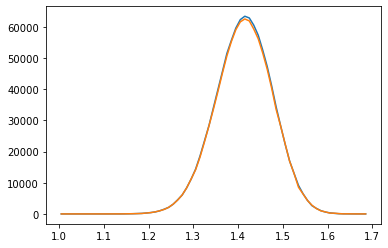

In [113]:
recalls = np.array(cand_count) / np.array(bin_esti)
recalls

/tmp/ipykernel_3326/2265722560.py:1: RuntimeWarning: invalid value encountered in true_divide
  recalls = np.array(cand_count) / np.array(bin_esti)


array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan, 0.87582339,        nan,        nan,
       0.83573736, 0.82118757, 0.80610402, 0.79052768, 0.774502  ,
       0.75807245, 0.7412859 , 0.72419015, 0.70683348, 0.68926405,
       0.67152969, 0.65367728, 0.63575261, 0.61779991, 0.59986169,
       0.58197844, 0.56418856, 0.54652811, 0.52903077, 0.51172774,
       0.49464768, 0.47781678, 0.46125867, 0.44499453, 0.42904309,
       0.41342075, 0.39814164, 0.3832177 , 0.3686588 , 0.35447285,
       0.3406659 , 0.32724229, 0.31420471, 0.30155437, 0.28929111,
       0.27741349, 0.26591891, 0.25480373, 0.24406337, 0.2336924 ,
       0.22368467, 0.21403332, 0.20473096, 0.19576969, 0.18714123,
       0.17883689, 0.17084773, 0.16316463, 0.15577824, 0.14867913,
       0.14185781, 0.13530478, 0.12901052, 0.12296562, 0.11716073,
       0.11158663,        nan,        nan,        nan])

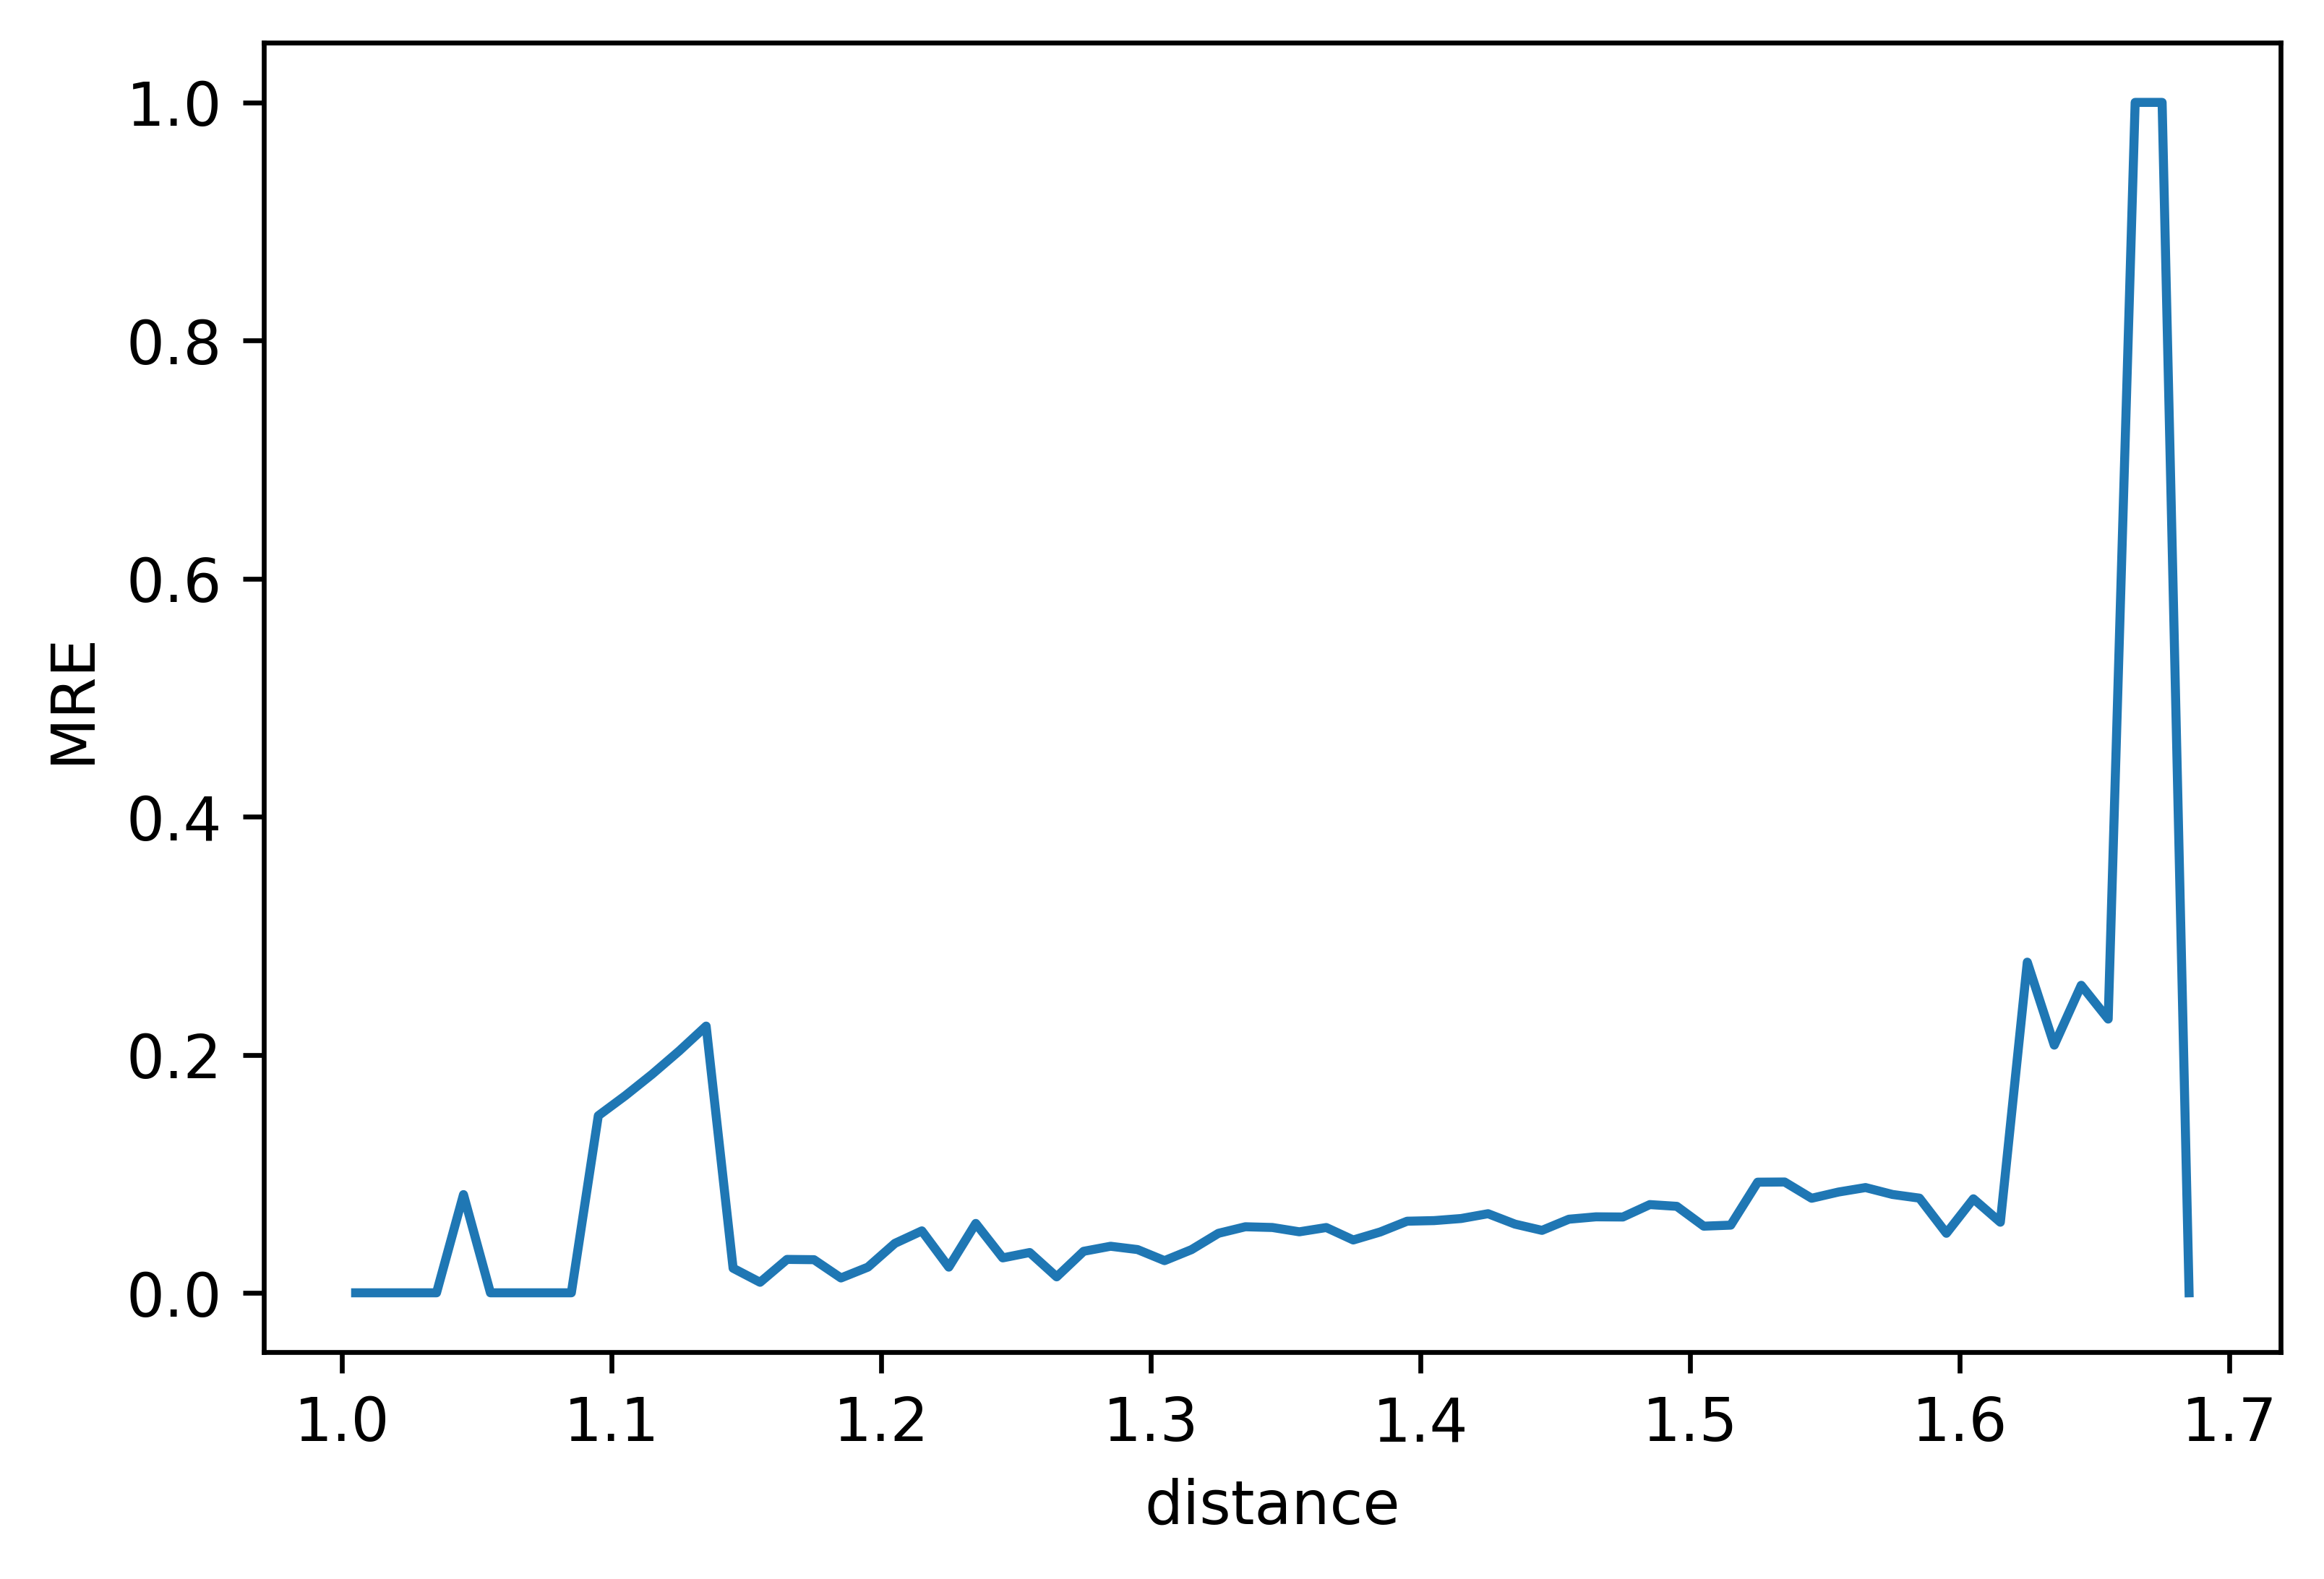

In [147]:
plt.clf()
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400
ax = plt.gca()
ax.plot(x_bins, mre/10)
ax.set_xlabel("distance")
ax.set_ylabel("MRE")
plt.show()

In [117]:
recall_qh = fvecs_read(exp_path + "/qh_recalls.fvecs")
recall_qh.shape

(1000, 70)

In [143]:
 mre/10

array([0.        , 0.        , 0.        , 0.        , 0.08249937,
       0.        , 0.        , 0.        , 0.        , 0.14877849,
       0.16557552, 0.18368156, 0.20315468, 0.22405392, 0.02065405,
       0.00882848, 0.02805348, 0.02781477, 0.0124729 , 0.02157319,
       0.04153144, 0.0520314 , 0.02156218, 0.05828069, 0.02934076,
       0.0338386 , 0.013398  , 0.03486475, 0.03909423, 0.03632717,
       0.0270272 , 0.03625332, 0.04998016, 0.05547921, 0.05486653,
       0.05124478, 0.05483438, 0.04437171, 0.05110025, 0.06014919,
       0.06065299, 0.0624076 , 0.06644574, 0.05769216, 0.0524506 ,
       0.06183051, 0.06382279, 0.06368018, 0.07410357, 0.07264328,
       0.05597467, 0.05684759, 0.09293493, 0.09307996, 0.07942197,
       0.08466915, 0.088411  , 0.08260978, 0.07953852, 0.05000149,
       0.07895589, 0.05929455, 0.2777651 , 0.20807412, 0.25832313,
       0.22995942, 1.        , 1.        , 0.        ])

In [29]:
from fvecs import *
gist = fvecs_read("/media/mydrive/KroneckerRotation/data/gist-train.fvecs")

In [5]:
distance = fvecs_read("/media/mydrive/distribution/ann-codes/in-memory/EXPERIMENTS/gist/distances.fvecs")

In [6]:
np.min(distance), np.max(distance)

(0.0, 8.060084)

In [30]:
np.mean(np.linalg.norm(gist, axis=1) ** 2) ** 0.5

2.6005563250813575